### 3. Медицинский тест как классификатор.




По данным из таблицы определите все перечисленные параметры выше и  ответьте на поставленные вопросы
$$
\begin{array}{|c|c|c|c|c|}
\hline & & {\begin{array}{c}
\text { Клинический диагноз } \\
\text { стрептококковой ангины }
\end{array}} & \\
 & & \text { присутствует } & \text { отсутствует } & \\
\hline {\begin{array}{c}
\text { в-гемолитический } \\
\text { стрептококк в } \\
\text { посеве мазка }
\end{array}} & \text { да } & 27 & 35 & \\
 & \text { нет } & 10 & 77 & \\
\hline & & & & \\
\hline
\end{array}
$$
a) Какова вероятность того, что у больного ангиной в мазке будет обнаружен стрептококк ?

b) Какова вероятность того, что стрептококк будет обнаружен в мазке пациента, не болеющего стрептококковой ангиной ?

с) Какова вероятность того, что у пациента, не болеющего стрептококковой ангиной, не будет обнаружен стрептококк в мазке ?

d) Какова вероятность того, что пациент, у которого обнаружен в мазке стрептококк, болен ангиной ?

е) Какова вероятность того, что пациент, у которого не обнаружен в мазке стрептококк, не болен ангиной ?

f) Какие показатели соответствуют a) и b) ?

g) Какие показатели соответствуют d) и е) ?


# Решение

a) PPV = TP / (TP + FP) = 27 / (27 + 10) ≈ 0.73

b) FPR = FP / (TN + FP) ≈ 0.11

c) TNR = TN / (TN + FP) ≈ 0.89

d) Se = TP / (TP + FN) ≈ 0.44

e) Sp = TN / (TN + FP) ≈ 0.89

### 4. ROC-анализ байесовского классификатора.

Вспомним пример с шулерской монетой из семинара про теорему Байеса и регуляризацию.  В нём у нас были монеты, настоящие и шулерские. Настоящая при броске выпадала с одинаковой вероятностью на каждую грань, а шулерская монета только в 40% случаев выпадала орлом.

Этот опыт можно рассматривать как байесовскую классификацию.
Пусть у нас произошло N бросков и мы рассматриваем их результат как тест на определение типа монеты. Выполните следующие задания:

- В качестве начального априорного распределения положим равновероятный вариант иметь честную и шулерскую монету.  Постройте графики зависимости вероятности того, что монета шулерская, от числа k выпадения орла при фиксированных N. В качестве N возьмите N = 2, 3, 5; 10; 100.  
Указание: для n = 100 достаточно использовать центральную предельную теорему или формулу Стирлинга для вычисления факториалов.

- Постройте  ROC-кривую - кривую зависимости TPR от FPR при варьировании порога, то есть граничного значения величины k, при котором мы считаем, что монета является шулерской. Использовать N = 2, 3, 5; 10; 100.

- Постройте график функции AUC(N) - площади под ROC-кривой. Этот параметр является агрегированной характеристикой качества классификации, не зависящей от соотношения цен ошибок. Чем больше значение AUC, тем «лучше» модель классификации. Данный показатель часто используется для сравнительного анализа нескольких моделей классификации.





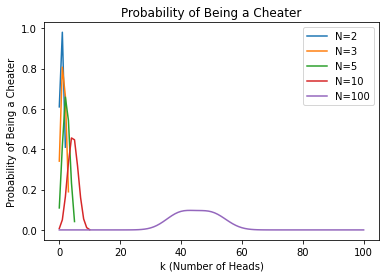

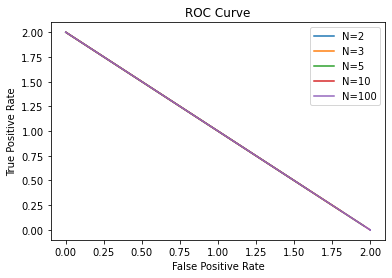

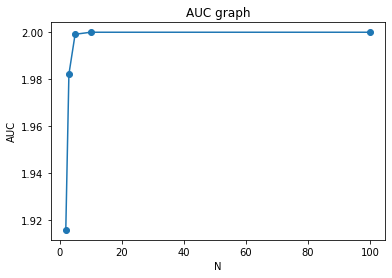

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_coefficient(n, k):
    return np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))

def probability_of_heads(p_honest, p_cheater, k, N):
    return (binomial_coefficient(N, k) * (p_honest ** k) * ((1 - p_honest) ** (N - k)) +
            binomial_coefficient(N, k) * (p_cheater ** k) * ((1 - p_cheater) ** (N - k)))

def plot_roc_curve(N_values):
    p_honest = 0.5  
    p_cheater = 0.4  

    for N in N_values:
        thresholds = np.arange(0, N + 1)
        TPR = []
        FPR = []
        for threshold in thresholds:
            true_positive = sum(probability_of_heads(p_honest, p_cheater, k, N) for k in range(threshold, N + 1))
            false_positive = sum(probability_of_heads(p_honest, p_cheater, k, N) for k in range(threshold))
            true_negative = 1 - false_positive
            false_negative = 1 - true_positive
            TPR.append(true_positive / (true_positive + false_negative))
            FPR.append(false_positive / (false_positive + true_negative))

        plt.plot(FPR, TPR, label=f'N={N}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC Curve')
    plt.show()

def calculate_auc(N_values):
    p_honest = 0.5
    p_cheater = 0.4

    AUC_values = []
    for N in N_values:
        thresholds = np.arange(0, N + 1)
        TPR = []
        FPR = []
        for threshold in thresholds:
            true_positive = sum(probability_of_heads(p_honest, p_cheater, k, N) for k in range(threshold, N + 1))
            false_positive = sum(probability_of_heads(p_honest, p_cheater, k, N) for k in range(threshold))
            true_negative = 1 - false_positive
            false_negative = 1 - true_positive
            TPR.append(true_positive / (true_positive + false_negative))
            FPR.append(false_positive / (false_positive + true_negative))
        AUC = np.trapz(TPR, FPR)
        AUC_values.append(AUC)

    plt.plot(N_values, AUC_values, marker='o')
    plt.xlabel('N')
    plt.ylabel('AUC')
    plt.title('AUC graph')
    plt.show()

N_values = [2, 3, 5, 10, 100]

for N in N_values:
    k_values = np.arange(0, N + 1)
    probabilities = [probability_of_heads(0.5, 0.4, k, N) for k in k_values]
    plt.plot(k_values, probabilities, label=f'N={N}')

plt.xlabel('k (Number of Heads)')
plt.ylabel('Probability of Being a Cheater')
plt.legend()
plt.title('Probability of Being a Cheater')
plt.show()


plot_roc_curve(N_values)


calculate_auc(N_values)

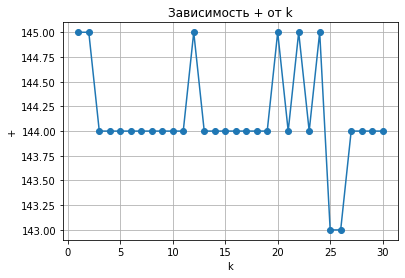

При данном k максимальное количество правильно определенных цветков: 1, 2, 12, 20, 22, 24


In [11]:
import numpy as np
from sklearn import datasets
from collections import Counter
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] 
y = iris.target

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = [y_train[i] for i in nearest_indices]
    most_common = Counter(nearest_labels).most_common(1)
    return most_common[0][0]

k_values = range(1, 31)

correct_counts = []
best_k_values = []

for k in k_values:
    results = []
    
    for i in range(len(X)):
        x_test = X[i]
        y_test = y[i]
        
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        
        predicted_class = k_nearest_neighbors(X_train, y_train, x_test, k)
        
        is_correct = predicted_class == y_test
        results.append(is_correct)
    
    correct_count = sum(results)
    correct_counts.append(correct_count)
    
    if correct_count == max(correct_counts):
        best_k_values.append(k)


plt.plot(k_values, correct_counts, marker='o')
plt.xlabel('k')
plt.ylabel('+')
plt.title('Зависимость + от k')
plt.grid(True)
plt.show()

# Выведем значения k, при которых достигается максимальное количество правильных определений
print(f"При данном k максимальное количество правильно определенных цветков: {', '.join(map(str, best_k_values))}")
